In [2]:
import torch
import os

In [3]:
import numpy as np
import torchvision.transforms as T

In [4]:
from PIL import Image

In [123]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
sorted(os.listdir('/Users/yashsurange/Documents/GitHub/FER-from-static-images/CK+_Complete'))

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

***
## dataset.py check

In [7]:
from dataset import ckplus
test_data=ckplus('./CK+_Complete/')

In [8]:
test_data.__getitem__(0)[0].shape

(300, 300, 3)

In [9]:
image =test_data.__getitem__(0)[0]

In [10]:
type(image)

numpy.ndarray

In [11]:
image=torch.tensor(image)

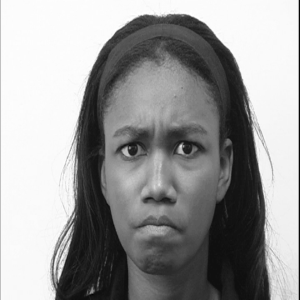

In [12]:
T.ToPILImage()(image.permute(2,0,1))

****

## preprocessing.py check

In [13]:
image.shape

torch.Size([300, 300, 3])

In [14]:
from preprocessing import preprocessing_image

In [15]:
preprocessing_object=preprocessing_image()
image_after_clahe=preprocessing_object.clahe(image)

In [16]:
image_after_clahe.shape

(300, 300, 3)

***
## Clahe check

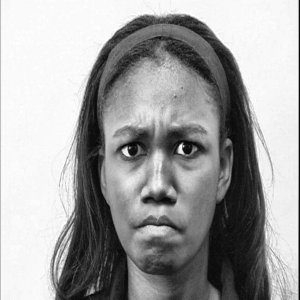

In [17]:
T.ToPILImage()(torch.tensor(image_after_clahe).permute(2,0,1))

****
## Face detection check

In [18]:
face=preprocessing_object.face_detection(image_after_clahe)

In [19]:
type(face)

numpy.ndarray

In [20]:
face.shape

(160, 160, 3)

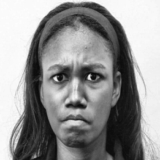

In [21]:
T.ToPILImage()(face)

***
## landmark anotation check

*****
## Testing everything from start


In [22]:
final_test=test_data.__getitem__(1)[0]

In [23]:
final_test=torch.tensor(final_test)

In [24]:
type(final_test)

torch.Tensor

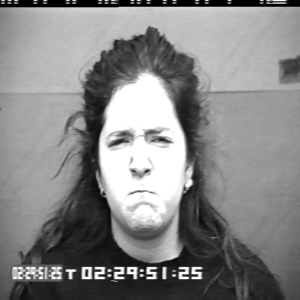

In [25]:
T.ToPILImage()(final_test.permute(2,0,1))

In [26]:
from preprocessing import preprocessing_image
preprocessing_ob=preprocessing_image()
after_clahe=preprocessing_ob.clahe(final_test)


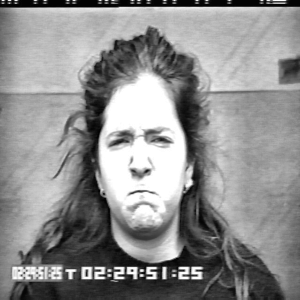

In [27]:
T.ToPILImage()(torch.tensor(after_clahe).permute(2,0,1))

In [28]:
face_detection=preprocessing_ob.face_detection(after_clahe)

In [29]:
annotated_image=preprocessing_ob.landmark_annotation(face_detection)

In [30]:
type(annotated_image)

numpy.ndarray

In [31]:
annotated_image.shape

(68, 2)

## Preprocessing all available images beforehand

In [32]:
## Creating custom dataset

from dataset import ckplus
customdataset=ckplus('./CK+_Complete/')

In [33]:
customdataset.__len__()

1635

In [34]:
total_images=[]

for i in range(customdataset.__len__()):
    total_images.append(customdataset.__getitem__(i)[0])
    

In [35]:
customdataset.__getitem__(0)[0].shape

(300, 300, 3)

In [36]:
total_images=np.array(total_images)

In [37]:
total_images.shape

(1635, 300, 300, 3)

In [38]:
checking_preprocessing=preprocessing_image()
my_clahe=checking_preprocessing.clahe(total_images[0])

In [39]:
total_images[i].shape

(300, 300, 3)

In [40]:
total_images=np.array(total_images)

In [41]:
my_normalised_image=[]

for i in range(total_images.shape[0]):
    my_normalised_image.append(checking_preprocessing.clahe(total_images[i]))

In [42]:
my_normalised_image=np.array(my_normalised_image,dtype=np.uint8)

In [43]:
my_normalised_image.shape

(1635, 300, 300, 3)

In [44]:
my_normalised_image.dtype

dtype('uint8')

In [45]:
my_normalised_image.shape

(1635, 300, 300, 3)

In [46]:
my_normalised_image.shape[0]

1635

In [47]:
my_normalised_image.shape

(1635, 300, 300, 3)

#### Understanding code snippets from : https://github.com/rohan598/Landmark-Aware-Part-based-Ensemble-Transfer-Learning-Network-for-Facial-Expression-Recognition/blob/main/notebooks/summary_notebook.ipynb

******

In [48]:
def load_images(filename_list, width =160, height =160, org_dim = False):
    img_array = []
    
    for i in range(filename_list.shape[0]):
        if org_dim == True:
            im = load_img(path=filename_list[i], color_mode="grayscale")
            im = np.array(im)
            im = np.repeat(im[...,np.newaxis],3,-1).reshape((im.shape[0],im.shape[1],3))
        
        else:  
            im = load_img(path=filename_list[i], target_size=(width,height),interpolation="bilinear", color_mode="grayscale")
            im = np.repeat(np.array(im)[...,np.newaxis],3,-1).reshape((width,height,3))
        
        img_array.append(im)
        
    return np.array(img_array)

In [49]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

In [50]:
filenames=(np.array(customdataset.data)[:,0])

In [51]:
len(filenames)

1635

In [52]:
filenames[1630]

'./CK+_Complete/surprise/S124_001_00000013.png'

In [53]:
total_images_reference=load_images(filenames,300,300)

In [54]:
total_images_reference.shape

(1635, 300, 300, 3)

****
## CLAHE check

In [55]:
def CLAHE(img,clahe, verbose=False):
    
    equr = clahe.apply(img[:,:,0])
    equg = clahe.apply(img[:,:,1])
    equb = clahe.apply(img[:,:,2])
    # print(np.all(equr == equb))
    # print(np.all(equg == equb))
    equ = np.dstack((equr,equg,equb))
    # print(equ.shape)
    
    if verbose==True:
        equ_minmax = cv2.normalize(equ, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        plt.imshow(np.hstack((img/255.0,equ/255.0,equ_minmax)))
        plt.show()
        
    return equ

In [56]:
testing_clahe=cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [57]:
def normalize_data(img_data,params={},verbose=False):
    
    normalized_img_data = []
    # contrast limited adaptive histogram equalization
    clahe_transform = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    for i in range(img_data.shape[0]):
        normalized_img_data.append(CLAHE(np.array(img_data[i]),clahe_transform,verbose))
        
    normalized_img_data = np.array(normalized_img_data,dtype=np.uint8)
    
    return normalized_img_data

In [58]:
normalized_img_array_300 = normalize_data(total_images_reference)

In [59]:
total_images_reference.shape

(1635, 300, 300, 3)

In [60]:
np.all(normalized_img_array_300==my_normalised_image)

True

*****

In [61]:
normalized_img_array_300.shape

(1635, 300, 300, 3)

### Creating face crops using ssd300



In [62]:
my_normalised_image.shape

(1635, 300, 300, 3)

In [63]:
checking_preprocessing.detection_model

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [64]:
face_cropped=[]
for i in range(my_normalised_image.shape[0]):
    face_cropped.append(checking_preprocessing.face_detection(my_normalised_image[i]))

In [65]:
checking_preprocessing.landmark_annotation(face_cropped[0])


array([[0.25625, 0.50625],
       [0.25625, 0.56875],
       [0.26875, 0.63125],
       [0.28125, 0.69375],
       [0.3    , 0.75   ],
       [0.325  , 0.80625],
       [0.35625, 0.85   ],
       [0.40625, 0.88125],
       [0.46875, 0.89375],
       [0.53125, 0.89375],
       [0.5875 , 0.86875],
       [0.63125, 0.825  ],
       [0.6625 , 0.76875],
       [0.68125, 0.7125 ],
       [0.7    , 0.6375 ],
       [0.70625, 0.56875],
       [0.7125 , 0.5    ],
       [0.29375, 0.44375],
       [0.31875, 0.4125 ],
       [0.3625 , 0.4    ],
       [0.4    , 0.40625],
       [0.44375, 0.41875],
       [0.5    , 0.41875],
       [0.5375 , 0.40625],
       [0.5875 , 0.39375],
       [0.63125, 0.40625],
       [0.6625 , 0.43125],
       [0.46875, 0.48125],
       [0.46875, 0.525  ],
       [0.4625 , 0.56875],
       [0.4625 , 0.6125 ],
       [0.41875, 0.6625 ],
       [0.44375, 0.6625 ],
       [0.46875, 0.66875],
       [0.49375, 0.66875],
       [0.51875, 0.6625 ],
       [0.325  , 0.49375],
 

In [66]:
len(face_cropped)

1635

In [67]:
checking_preprocessing=preprocessing_image()

In [68]:
face_cropped.pop(1576)
face_cropped.pop(1630)

array([[[ 52,  52,  52],
        [ 54,  54,  54],
        [ 57,  57,  57],
        ...,
        [ 77,  77,  77],
        [ 70,  70,  70],
        [ 67,  67,  67]],

       [[ 48,  48,  48],
        [ 50,  50,  50],
        [ 54,  54,  54],
        ...,
        [ 73,  73,  73],
        [ 68,  68,  68],
        [ 67,  67,  67]],

       [[ 45,  45,  45],
        [ 47,  47,  47],
        [ 53,  53,  53],
        ...,
        [ 70,  70,  70],
        [ 67,  67,  67],
        [ 67,  67,  67]],

       ...,

       [[130, 130, 130],
        [137, 137, 137],
        [145, 145, 145],
        ...,
        [174, 174, 174],
        [167, 167, 167],
        [154, 154, 154]],

       [[127, 127, 127],
        [136, 136, 136],
        [146, 146, 146],
        ...,
        [165, 165, 165],
        [165, 165, 165],
        [158, 158, 158]],

       [[144, 144, 144],
        [155, 155, 155],
        [158, 158, 158],
        ...,
        [162, 162, 162],
        [161, 161, 161],
        [164, 164, 164]]

In [69]:
face_cropped.pop(1629)

array([[[ 54,  54,  54],
        [ 58,  58,  58],
        [ 59,  59,  59],
        ...,
        [227, 227, 227],
        [232, 232, 232],
        [233, 233, 233]],

       [[ 54,  54,  54],
        [ 57,  57,  57],
        [ 60,  60,  60],
        ...,
        [226, 226, 226],
        [228, 228, 228],
        [229, 229, 229]],

       [[ 50,  50,  50],
        [ 53,  53,  53],
        [ 57,  57,  57],
        ...,
        [228, 228, 228],
        [230, 230, 230],
        [228, 228, 228]],

       ...,

       [[ 38,  38,  38],
        [ 38,  38,  38],
        [ 37,  37,  37],
        ...,
        [ 49,  49,  49],
        [ 53,  53,  53],
        [ 59,  59,  59]],

       [[ 41,  41,  41],
        [ 41,  41,  41],
        [ 41,  41,  41],
        ...,
        [ 47,  47,  47],
        [ 49,  49,  49],
        [ 53,  53,  53]],

       [[ 35,  35,  35],
        [ 42,  42,  42],
        [ 39,  39,  39],
        ...,
        [ 42,  42,  42],
        [ 42,  42,  42],
        [ 50,  50,  50]]

In [70]:
len(face_cropped)

1632

In [71]:
testing_lr_annotation=[]
for i in range(len(face_cropped)):
    testing_lr_annotation.append(checking_preprocessing.landmark_annotation(face_cropped[i]))

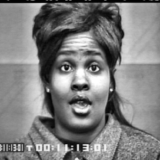

In [72]:
Image.fromarray(face_cropped[1575])

In [73]:
checking_preprocessing.landmark_annotation(face_cropped[200])

array([[0.275  , 0.41875],
       [0.28125, 0.48125],
       [0.2875 , 0.5375 ],
       [0.3    , 0.5875 ],
       [0.325  , 0.6375 ],
       [0.35   , 0.68125],
       [0.3875 , 0.71875],
       [0.43125, 0.7375 ],
       [0.48125, 0.7375 ],
       [0.53125, 0.73125],
       [0.575  , 0.7    ],
       [0.60625, 0.65625],
       [0.63125, 0.60625],
       [0.64375, 0.55625],
       [0.65   , 0.49375],
       [0.65   , 0.4375 ],
       [0.65   , 0.3875 ],
       [0.30625, 0.35625],
       [0.325  , 0.325  ],
       [0.3625 , 0.3125 ],
       [0.4    , 0.3125 ],
       [0.4375 , 0.31875],
       [0.475  , 0.3125 ],
       [0.5125 , 0.3    ],
       [0.55625, 0.3    ],
       [0.59375, 0.30625],
       [0.6125 , 0.3375 ],
       [0.4625 , 0.35625],
       [0.4625 , 0.39375],
       [0.4625 , 0.425  ],
       [0.4625 , 0.4625 ],
       [0.43125, 0.50625],
       [0.45   , 0.5125 ],
       [0.46875, 0.5125 ],
       [0.4875 , 0.50625],
       [0.5    , 0.5    ],
       [0.35   , 0.38125],
 

In [74]:
any(np.array_equal(arr, np.array([])) for arr in testing_lr_annotation)

False

In [75]:
testing_lr_annotation[0]

array([[0.25625, 0.50625],
       [0.25625, 0.56875],
       [0.26875, 0.63125],
       [0.28125, 0.69375],
       [0.3    , 0.75   ],
       [0.325  , 0.80625],
       [0.35625, 0.85   ],
       [0.40625, 0.88125],
       [0.46875, 0.89375],
       [0.53125, 0.89375],
       [0.5875 , 0.86875],
       [0.63125, 0.825  ],
       [0.6625 , 0.76875],
       [0.68125, 0.7125 ],
       [0.7    , 0.6375 ],
       [0.70625, 0.56875],
       [0.7125 , 0.5    ],
       [0.29375, 0.44375],
       [0.31875, 0.4125 ],
       [0.3625 , 0.4    ],
       [0.4    , 0.40625],
       [0.44375, 0.41875],
       [0.5    , 0.41875],
       [0.5375 , 0.40625],
       [0.5875 , 0.39375],
       [0.63125, 0.40625],
       [0.6625 , 0.43125],
       [0.46875, 0.48125],
       [0.46875, 0.525  ],
       [0.4625 , 0.56875],
       [0.4625 , 0.6125 ],
       [0.41875, 0.6625 ],
       [0.44375, 0.6625 ],
       [0.46875, 0.66875],
       [0.49375, 0.66875],
       [0.51875, 0.6625 ],
       [0.325  , 0.49375],
 

****

### Analysing the model

In [76]:
landmarks_dict = {
    "full":{
        "start_idx":0,
        "end_idx":68,
        "output_size":136
    },
    "mouth":{
        "start_idx":48,
        "end_idx":68,
        "output_size":40
    },
    "eyes":{
        "start_idx":36,
        "end_idx":48,
        "output_size":24
    },
    "nose":{
        "start_idx":27,
        "end_idx":36,
        "output_size":18
    },
    "eyebrows":{
        "start_idx":17,
        "end_idx":27,
        "output_size":20
    },
    "jaw":{
        "start_idx":0,
        "end_idx":17,
        "output_size":34
    }
}

In [77]:
landmarks_dict.keys()

dict_keys(['full', 'mouth', 'eyes', 'nose', 'eyebrows', 'jaw'])

In [78]:
landmarks_dict['nose']
# There are 9 points representing nose, each point has x and y hence total are 18

{'start_idx': 27, 'end_idx': 36, 'output_size': 18}

In [79]:
face_cropped[0].astype('float64').dtype

dtype('float64')

In [80]:
def preprocess_input_v1(x):
  x /= 255.0
  x -= 0.5
  x *= 2.0
  return x

In [81]:
preprocess_input_v1(face_cropped[0].astype('float64'))

array([[[0.96078431, 0.96078431, 0.96078431],
        [0.97647059, 0.97647059, 0.97647059],
        [0.96078431, 0.96078431, 0.96078431],
        ...,
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863]],

       [[0.96862745, 0.96862745, 0.96862745],
        [0.96862745, 0.96862745, 0.96862745],
        [0.96078431, 0.96078431, 0.96078431],
        ...,
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863]],

       [[0.96862745, 0.96862745, 0.96862745],
        [0.97647059, 0.97647059, 0.97647059],
        [0.97647059, 0.97647059, 0.97647059],
        ...,
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863]],

       ...,

       [[0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0

In [82]:
learning_rate_base_reg_lr = 0.01
batch_size_reg_lr = 32
epochs_reg_lr = 10
steps_per_epoch_reg_lr = 30
#checkpoint_name_reg_lr = f'checkpoint_landmarks_model_{lr_model_name}_test1'
#filename_reg_lr = f"logs_dict_lr_{lr_model_name}_test1.json"
preprocess_input_reg_lr = preprocess_input_v1

In [83]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
aug = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05, 
        horizontal_flip=True
    )

In [84]:
# This is the ert algorithm
import dlib
ert_landmarks_predictor = dlib.shape_predictor("/Users/yashsurange/Documents/GitHub/FER-from-static-images/shape_predictor_68_face_landmarks.dat")

In [85]:
class ImageDataGeneratorLandmarksOnly(object):
    def __init__(self,
               datagen,
               landmarks_predictor,
               target_shape=None,
               gen_batch_size = 1, 
               preprocess_input = None,
               start_idx = 0,
               end_idx = 68,
               verbose = 0):

        self.datagen = datagen
        self.target_shape = target_shape
        self.landmarks_predictor = landmarks_predictor
        print(type(preprocess_input))

        self.preprocess_input = preprocess_input
        self.gen_batch_size = gen_batch_size
        self.start_idx = start_idx
        self.end_idx = end_idx

        self.verbose = verbose

    def flow(self, X, y, batch_size = 4):

        generator = self.datagen.flow(X, y, batch_size = self.gen_batch_size)

        while True:

            N = 0
            X_batch, ylr_batch = [], []
            dict_labels_collected = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}
            got2 = False

            while N < batch_size:
                X_gen, yemotion_gen = generator.next()

                skip_cnt = 0
                for i in range(X_gen.shape[0]):

                    if got2==True and dict_labels_collected[np.where(yemotion_gen[i]==1)[0][0]]>=(batch_size/7):
                        skip_cnt+=1
                        continue

                    Xaug = X_gen[i]
                    Xaug = Xaug.astype(dtype='uint8')

                    x1, y1, x2, y2,w,h = 0,0,160,160,160,160
                    face_rect = dlib.rectangle(x1, y1, x2, y2)
                    landmarks = self.landmarks_predictor(Xaug, face_rect) 
                    landmarks = landmarks_to_np(landmarks)

                    if self.verbose == 1:
                        visualize_face(np.array(Xaug),x1,y1,w,h,landmarks)

                    skip_image = False

                    landmarks = landmarks.astype(np.float32)

                    for j in range(landmarks.shape[0]):
                        landmarks[j][0]/=(IMG_WIDTH)
                        landmarks[j][1]/=(IMG_HEIGHT)

                    landmarks = landmarks.reshape((-1,))

                    if skip_image==False:
                        Xaug = Xaug.astype(dtype='float32')
                        X_batch.append(Xaug)
                        ylr_batch.append(landmarks[2*self.start_idx:2*self.end_idx])
                        dict_labels_collected[np.where(yemotion_gen[i]==1)[0][0]]+=1
                        if dict_labels_collected[np.where(yemotion_gen[i]==1)[0][0]]==((batch_size/7)+1):
                            got2=True

                    else:
                        skip_cnt += 1 

                    if len(X_batch)>=batch_size:
                        break

                N+=self.gen_batch_size - skip_cnt

            X_batch, ylr_batch = np.array(X_batch), np.array(ylr_batch)
            X_batch =self.preprocess_input(X_batch)
      
            yield (X_batch,ylr_batch)

In [86]:
aug_lr_train = ImageDataGeneratorLandmarksOnly(aug,ert_landmarks_predictor, gen_batch_size=1, preprocess_input = preprocess_input_v1)

<class 'function'>


In [87]:
lr_model_name = "full"

In [88]:
## params dictionary
params_reg_lr = {
    "output_size":landmarks_dict[lr_model_name]["output_size"],
    "start_idx":landmarks_dict[lr_model_name]["start_idx"],
    "end_idx":landmarks_dict[lr_model_name]["end_idx"],
    "learning_rate_base": learning_rate_base_reg_lr,
    "batch_size":batch_size_reg_lr,
    "epochs":epochs_reg_lr,
    "steps_per_epoch":steps_per_epoch_reg_lr,
    # "checkpoint":checkpoint_name_reg_lr,
    # "filename":filename_reg_lr,
    "model_name":lr_model_name,
    "preprocess_input":preprocess_input_reg_lr,
    "aug_lr":aug_lr_train,
    "landmarks_predictor":ert_landmarks_predictor
}

In [89]:
def landmarks_to_np(shape, dtype="int"):
    
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)
    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    # return the list of (x, y)-coordinates
    return coords

In [90]:
def visualize_face(im, x, y, w, h, landmarks):
    # draw box over face
    cv2.rectangle(im, (x,y), (x+w,y+h), (0,255,0), 2)
 
    # # loop over the (x, y)-coordinates for the facial landmarks and draw them on the image
    for (xl, yl) in landmarks.reshape((int(landmarks.shape[0]/2),2)):
        cv2.circle(im,(int(xl), int(yl)), 1, (0, 0, 255), -1)

    plt.imshow(im)
    plt.show()
    
def visualize_face_new(im,landmarks):
    # draw box over face
    cv2.rectangle(im, (0,0), (160,160), (0,255,0), 2)
    for (x,y) in landmarks:
            cv2.circle(im, (x, y), 2, (0, 255, 0), -1)
    
    plt.imshow(im)
    plt.show()

In [91]:
def create_test_dataset(X, landmarks_predictor, preprocess_input = None, start_idx = 0, end_idx = 68, verbose=0):
  
    Xlr, ylr = [], []
    test=None
    for i in range(X.shape[0]):
        # x1, y1, x2, y2,w,h = 0,0,160,160,160,160
        # face_rect = dlib.rectangle(x1, y1, x2, y2)
        
        # landmarks = landmarks_predictor(X[i], face_rect)
        
        # landmarks = landmarks_to_np(landmarks)
        
        # landmarks = landmarks.astype(dtype='float32')

        # landmarks = landmarks.reshape((-1,))
        
        detector = dlib.get_frontal_face_detector()
        predictor = dlib.shape_predictor('/Users/yashsurange/Documents/GitHub/FER-from-static-images/shape_predictor_68_face_landmarks.dat')
        
        # This detects the face in the image
        detect_face=detector(X[i],0)
        
        # At present, this we are considering only 1 image, will add support for images in batches
        landmarks=predictor(X[i],detect_face[0])
        landmarks = face_utils.shape_to_np(landmarks)
        

        if verbose==1:
            # visualize_face(np.array(X[i]),x1,y1,int(w),int(h),landmarks[2*start_idx:2*end_idx])
            visualize_face_new(X[i],landmarks)
        break
        # landmarks = landmarks.astype(dtype='float32')

        # landmarks = landmarks.reshape((-1,))
        landmarks = landmarks/IMG_WIDTH
        ylr.append(landmarks[2*start_idx:2*end_idx])

    ylr = np.array(ylr)
    Xlr = preprocess_input(X.astype(np.float32))

    return (Xlr, ylr)
    # return test

In [93]:
IMG_WIDTH = 160
IMG_HEIGHT = 160

In [94]:
face_cropped[0].dtype

dtype('uint8')

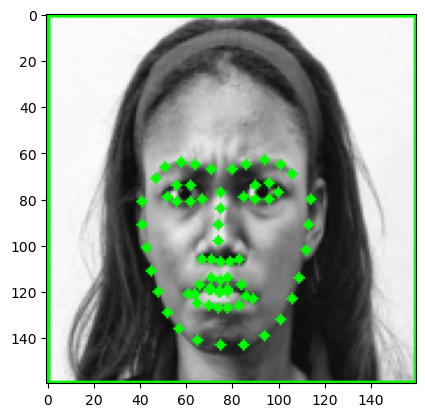

(array([[[[-1.        ,  1.        , -1.        ],
          [-1.        ,  1.        , -1.        ],
          [-1.        ,  1.        , -1.        ],
          ...,
          [-1.        ,  1.        , -1.        ],
          [-1.        ,  1.        , -1.        ],
          [-1.        ,  1.        , -1.        ]],
 
         [[-1.        ,  1.        , -1.        ],
          [-1.        ,  1.        , -1.        ],
          [-1.        ,  1.        , -1.        ],
          ...,
          [-1.        ,  1.        , -1.        ],
          [-1.        ,  1.        , -1.        ],
          [-1.        ,  1.        , -1.        ]],
 
         [[-1.        ,  1.        , -1.        ],
          [-1.        ,  1.        , -1.        ],
          [ 0.9764706 ,  0.9764706 ,  0.9764706 ],
          ...,
          [ 0.92156863,  0.92156863,  0.92156863],
          [ 0.92156863,  0.92156863,  0.92156863],
          [-1.        ,  1.        , -1.        ]],
 
         ...,
 
         [[-

In [95]:
from imutils import face_utils
create_test_dataset(np.array(face_cropped), params_reg_lr["landmarks_predictor"], preprocess_input_reg_lr,verbose=1)

In [96]:
np.array(face_cropped)[0].shape

(160, 160, 3)

In [ ]:
Xlr_valid[0].shape

(160, 160, 3)

In [92]:
def reg_training_lr(X_train, y_train, X_valid, y_valid, params):
  
    print(f"------- Creating/Loading model-------")
    # use your own base checkpoint path refering to google drive directory where model will be saved
    checkpoint_full_path = os.path.join(CHECKPOINT_PATH,params["checkpoint"])
    recovery_filepath = os.path.join(RECOVERY_DIR, params["filename"])

    ## optional load
    try:
        landmarks_model = load_model(os.path.join(CHECKPOINT_PATH,params["checkpoint"]))
        print("loaded model")
        landmarks_model.summary()
  
    ## create landmarks model
    except:
        landmarks_model = create_landmarks_model(params["output_size"])
        print("new model")  
        landmarks_model.summary()
        landmarks_model.compile(loss={"lr_output":"mae"},optimizer=Adam(learning_rate=params["learning_rate_base"]))


    #### Training landmarks model
    monitor_training_callback = MonitorSingleTraining(filepath = recovery_filepath , model_name = params["model_name"], epochs=params["epochs"])
    callbacks = [
        ModelCheckpoint(filepath=checkpoint_full_path,
          save_weights_only=False,
          monitor='val_loss', 
          mode='min',
          save_best_only=True,
          verbose=1),
          monitor_training_callback
    ]

    ### Please don't tweak the line below, as it manages training recovery
    epochs_left = monitor_training_callback.get_epochs_left()

    ## compile emotion model
    landmarks_model.compile(loss={"lr_output":"mae"},optimizer=Adam(lr=params["learning_rate_base"]))

    ## Start training
    print(f"------- Training model -------")

    ## fit data
    history = landmarks_model.fit(
                  x = params["aug_lr"].flow(X_train, y_train, 
                  batch_size = params["batch_size"]),
                  epochs= epochs_left, # do not change epochs here, you can set the value in params["epochs"]
                  validation_data = (X_valid, y_valid),
                  steps_per_epoch=params["steps_per_epoch"],
                  callbacks = callbacks,
                  verbose = 1
                )
  
    return history

In [105]:
## params dictionary
params_reg_lr = {
    "output_size":landmarks_dict[lr_model_name]["output_size"],
    "start_idx":landmarks_dict[lr_model_name]["start_idx"],
    "end_idx":landmarks_dict[lr_model_name]["end_idx"],
    "learning_rate_base": learning_rate_base_reg_lr,
    "batch_size":batch_size_reg_lr,
    "epochs":epochs_reg_lr,
    "steps_per_epoch":steps_per_epoch_reg_lr,
    # "checkpoint":checkpoint_name_reg_lr,
    # "filename":filename_reg_lr,
    "model_name":lr_model_name,
    "preprocess_input":preprocess_input_reg_lr,
    "aug_lr":aug_lr_train,
    "landmarks_predictor":ert_landmarks_predictor
}

In [99]:
len(testing_lr_annotation)

1632

In [104]:
face_cropped=np.array(face_cropped).astype('float64')

In [109]:
percentage_to_sample=80
no_of_images=int(len(face_cropped)*percentage_to_sample/100)

In [112]:
train_set=np.random.choice(face_cropped,no_of_images,replace=False)

ValueError: a must be 1-dimensional

In [113]:
face_cropped.shape

(1632, 160, 160, 3)

In [ ]:
history_lr = reg_training_lr(train_face_crop, y_train, Xlr_valid, ylr_valid, params=params_reg_lr)

In [125]:
from config import parameters_landmark_annotation

parameters_landmark_annotation['output_size']

136

In [126]:
parameters_landmark_annotation['checkpoint']

KeyError: 'checkpoint'